In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from scipy.stats import spearmanr

In [79]:
# Load in Data
metrics = pd.read_csv('Metrics2016.csv')
capital_exp = pd.read_csv('Capital_Expenses_2016.csv')

In [80]:
metrics

,Unnamed: 0,Name,City,State,NTD ID,Reporter Type,Primary UZA Population,Agency VOMS,Cost per Hour Total,Passengers per Hour Total,Cost per Passenger Mile Total,Fare Revenues Earned Total,Total Operating Expenses Total,Unlinked Passenger Trips Total,Vehicle Revenue Hours Total,Passenger Miles Total,Vehicle Revenue Miles Total
0,0,MTA New York City Transit,New York,NY,20008,Full Reporter,18351295,11004,1248.2912,286.6910,13.9172,4330281843,9148851698,3464743546,37221568,12832195005,494972905
1,5,New Jersey Transit Corporation,Newark,NJ,20080,Full Reporter,18351295,4056,2759.6084,406.2525,16.6229,997242799,2217813596,277012293,8779019,3489897839,164484797
2,13,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,90154,Full Reporter,12150996,3544,1455.0170,384.6802,3.5558,355956638,1574418345,432985182,8809623,2172060564,128990049
3,19,Washington Metropolitan Area Transit Authority,Washington,DC,30030,Full Reporter,4586770,3172,650.6884,114.0921,13.7797,724560300,1709025227,379141810,9036931,1893604948,138065568
4,23,King County Department of Transportation,Seattle,WA,1,Full Reporter,3059393,2818,1791.1617,251.7733,19.7319,175521753,625735838,127384761,4662806,602791388,61048893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,3663,Town of Lauderdale-By-The-Sea,Lauderdale-By-The-Sea,FL,40260,Reduced Reporter,5502379,1,35.9981,10.5106,0.0000,0,133589,39005,3711,0,41820
923,3667,"Mission Hill Link, Inc.",Boston,MA,10182,Reduced Reporter,4181019,1,49.2623,4.2186,0.0000,7465,117195,10036,2379,0,16588
924,3670,Los Angeles County Department of Public Works ...,Alhambra,CA,90272,Reduced Reporter,12150996,1,42.5149,13.3466,0.0000,11785,199310,62569,4688,0,52030
925,3675,Town of Hillsboro Beach,Hillsboro Beach,FL,40248,Reduced Reporter,5502379,1,45.8083,9.3863,0.0000,0,92258,18904,2014,0,26030


In [81]:
capital_exp

,Unnamed: 0,Name,City,State,NTD ID,Reporter Type,Primary UZA Population,Guideway,Stations,Administrative Buildings,Maintenance Buildings,Passenger Vehicles,Other Vehicles,Fare Collection Equipment,Communication & Information Systems,Other,Reduced Reporter Expenses,Total
0,0,MTA New York City Transit,New York,NY,20008,Full Reporter,18351295,693512674,838892516,13976558,126272788,210601391,10109713,69930235,580099710,190562965,0,2733958550
1,1,New Jersey Transit Corporation,Newark,NJ,20080,Full Reporter,18351295,94815183,31733712,6802303,21365247,154653001,3115589,35884316,62844705,46605289,0,457819345
2,2,Los Angeles County Metropolitan Transportation...,Los Angeles,CA,90154,Full Reporter,12150996,1060477265,139823316,3821923,110293044,299112510,11113190,564754,26669954,0,0,1651875956
3,3,Washington Metropolitan Area Transit Authority,Washington,DC,30030,Full Reporter,4586770,173841196,140533494,18958101,104795333,384743042,7263038,35277642,82139991,2439102,0,949990939
4,4,King County Department of Transportation,Seattle,WA,1,Full Reporter,3059393,1160403,2408143,1748966,7999956,233106853,4084698,326902,4802648,16917426,0,272555995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,2239,Loop Trolley Transportation Development District,St. Louis,MO,70057,Building Reporter,2150706,11182266,0,0,6976753,67675,0,0,0,2353423,0,20580117
676,2240,City of Stamford,Stamford,CT,10127,Building Reporter,923311,295258,0,0,0,0,0,0,0,5877632,0,6172890
677,2242,M-1 Rail,Detroit,MI,50213,Building Reporter,3734090,24648803,1174707,0,4803545,10892208,0,0,32873,12931950,0,54484086
678,2244,City of Milwaukee,Milwaukee,WI,55312,Building Reporter,1376476,7173752,0,0,0,0,3087446,0,0,8635751,0,18896949


In [82]:
ids_in_metrics = set(metrics['NTD ID'])
ids_in_capital_exp = set(capital_exp['NTD ID'])

only_in_metrics = ids_in_metrics - ids_in_capital_exp
only_in_capital_exp = ids_in_capital_exp - ids_in_metrics

print(f"NTD IDs only in metrics: {only_in_metrics}")
print(f"NTD IDs only in capital_exp: {only_in_capital_exp}")


NTD IDs only in metrics: {50182, 90119, 55308, 50191, 50194, 50195, 50197, 50201, 50208, 50209, 50210, 20006, 50215, 20009, 42, 51, 90275, 55, 90169, 60, 63, 40005, 40010, 40011, 40111, 90194, 40020, 90197, 90199, 40036, 40115, 90214, 60013, 90222, 60016, 40051, 20085, 90230, 40055, 20089, 20096, 60034, 90243, 60035, 40068, 90246, 80007, 90247, 40073, 90250, 90251, 90252, 90253, 90255, 90256, 90257, 90258, 90259, 90260, 90261, 90262, 90263, 90264, 90265, 80025, 20122, 90268, 90269, 90270, 90271, 40094, 90273, 90272, 90274, 90276, 90277, 90278, 90279, 90280, 90281, 90282, 40105, 90284, 90285, 60077, 90287, 90288, 90289, 90290, 90291, 60082, 60084, 90294, 90295, 90296, 90297, 90298, 40114, 90300, 40120, 60094, 40123, 40124, 40125, 40126, 40131, 20160, 41157, 40133, 20161, 20163, 20165, 20166, 60107, 60109, 40141, 40143, 40144, 20175, 20176, 40147, 20179, 40150, 20182, 40152, 40153, 20183, 20187, 60125, 20189, 60127, 40160, 20190, 20193, 40163, 60132, 40164, 20191, 20195, 20196, 40169, 20

In [83]:
metrics_filtered = metrics[metrics['NTD ID'].isin(capital_exp['NTD ID'])]
capital_exp_filtered = capital_exp[capital_exp['NTD ID'].isin(metrics['NTD ID'])]


In [84]:
metrics_filtered = metrics_filtered.sort_values('NTD ID')
capital_exp_filtered = capital_exp_filtered.sort_values('NTD ID')


In [85]:
metrics_filtered

,Unnamed: 0,Name,City,State,NTD ID,Reporter Type,Primary UZA Population,Agency VOMS,Cost per Hour Total,Passengers per Hour Total,Cost per Passenger Mile Total,Fare Revenues Earned Total,Total Operating Expenses Total,Unlinked Passenger Trips Total,Vehicle Revenue Hours Total,Passenger Miles Total,Vehicle Revenue Miles Total
4,23,King County Department of Transportation,Seattle,WA,1,Full Reporter,3059393,2818,1791.1617,251.7733,19.7319,175521753,625735838,127384761,4662806,602791388,61048893
72,284,Spokane Transit Authority,Spokane,WA,2,Full Reporter,387847,307,297.4265,37.7889,7.7628,8735265,59338978,10922108,590751,47999612,9051663
43,188,Pierce County Transportation Benefit Area Auth...,Tacoma,WA,3,Full Reporter,3059393,533,428.7999,31.4543,16.3867,11912835,86056497,9764786,710058,60579860,11507009
264,886,Everett Transit,Everett,WA,5,Full Reporter,3059393,58,261.4813,21.2722,11.4548,1391585,19996439,2067142,151712,8007347,1803134
254,848,Yakima Transit,Yakima,WA,6,Full Reporter,129534,63,280.8700,33.8637,6.5890,1323751,7810806,1185587,99364,7592191,1605243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,2727,City of West Covina,West Covina,CA,90293,Reduced Reporter,12150996,8,103.2822,7.4053,0.0000,65855,1041899,78188,19759,0,248444
379,1225,Tahoe Transportation District,Zephyr Cove,NV,91092,Full Reporter,210000,36,452.1641,32.7208,4.1964,624091,4892893,808593,54062,2648,798879
383,1254,City of Glendale,Glendale,CA,99423,Full Reporter,12150996,34,173.3392,27.0108,5.9712,1102223,7477578,1871986,90405,4207890,835044
422,1387,City of Pasadena,Pasadena,CA,99424,Reduced Reporter,12150996,29,150.7327,29.1367,0.0000,815221,6089552,1675734,82978,0,877792


In [86]:
capital_exp_filtered

,Unnamed: 0,Name,City,State,NTD ID,Reporter Type,Primary UZA Population,Guideway,Stations,Administrative Buildings,Maintenance Buildings,Passenger Vehicles,Other Vehicles,Fare Collection Equipment,Communication & Information Systems,Other,Reduced Reporter Expenses,Total
4,4,King County Department of Transportation,Seattle,WA,1,Full Reporter,3059393,1160403,2408143,1748966,7999956,233106853,4084698,326902,4802648,16917426,0,272555995
67,73,Spokane Transit Authority,Spokane,WA,2,Full Reporter,387847,1129081,4296577,272958,251349,3424488,166186,239187,3092250,257806,0,13129882
39,44,Pierce County Transportation Benefit Area Auth...,Tacoma,WA,3,Full Reporter,3059393,0,670849,1030,56418,10959069,651220,360105,1552619,152791,0,14404101
246,316,Everett Transit,Everett,WA,5,Full Reporter,3059393,0,28110,225686,184450,261649,51430,0,15350,0,0,766675
237,299,Yakima Transit,Yakima,WA,6,Full Reporter,129534,0,0,0,0,2135116,28897,0,0,7198,0,2171211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1403,City of West Covina,West Covina,CA,90293,Reduced Reporter,12150996,0,0,0,0,0,0,0,0,0,214474,214474
341,483,Tahoe Transportation District,Zephyr Cove,NV,91092,Full Reporter,210000,0,61835,0,0,388120,0,0,89868,0,0,539823
349,501,City of Glendale,Glendale,CA,99423,Full Reporter,12150996,0,0,0,531882,4910119,0,0,0,0,0,5442001
373,566,City of Pasadena,Pasadena,CA,99424,Reduced Reporter,12150996,0,0,0,0,0,0,0,0,0,299858,299858


In [87]:
metrics_ids = set(metrics_filtered['NTD ID'])
capital_exp_ids = set(capital_exp_filtered['NTD ID'])


only_in_metrics = metrics_ids - capital_exp_ids
only_in_capital_exp = capital_exp_ids - metrics_ids


print(f"NTD IDs only in metrics_filtered: {only_in_metrics}")
print(f"NTD IDs only in capital_exp_filtered: {only_in_capital_exp}")


NTD IDs only in metrics_filtered: set()
NTD IDs only in capital_exp_filtered: set()


In [92]:
# Normalized by population
ridership_norm = metrics_filtered['Unlinked Passenger Trips Total']/metrics_filtered['Primary UZA Population']
capital_total_norm = capital_exp_filtered['Total']/capital_exp_filtered['Primary UZA Population']
logridership = np.log10(ridership_norm)
logcapital = np.log10(capital_total_norm)

Text(0, 0.5, 'Ridership Normalized')

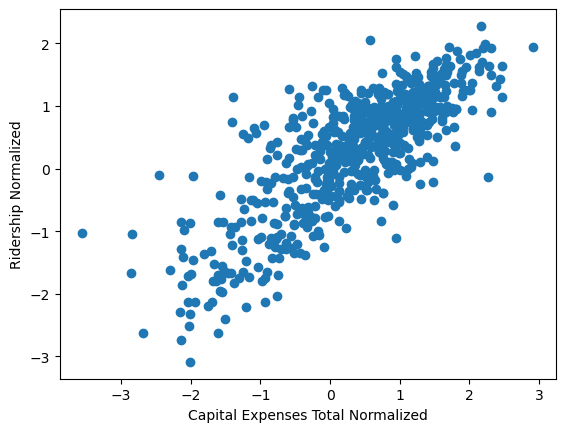

In [96]:
fig, ax = plt.subplots()
ax.plot(logcapital,logridership,'o')
ax.set_xlabel('Capital Expenses Total Normalized')
ax.set_ylabel('Ridership Normalized')

In [95]:
fare_collection_norm = capital_exp_filtered['Fare Collection Equipment']/capital_exp_filtered['Primary UZA Population']
logfare = np.log10(fare_collection_norm)

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Ridership Normalized')

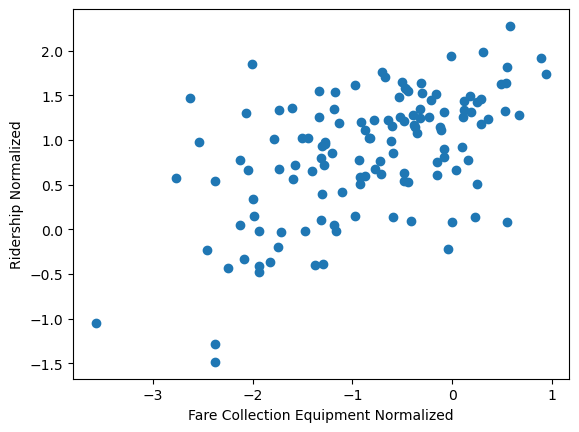

In [97]:
fig, ax = plt.subplots()
ax.plot(logfare,logridership,'o')
ax.set_xlabel('Fare Collection Equipment Normalized')
ax.set_ylabel('Ridership Normalized')

In [102]:
plotting_columns_capital = list(capital_exp_filtered.columns)[7:]
print(plotting_columns_capital)

['Guideway', 'Stations', 'Administrative Buildings', 'Maintenance Buildings', 'Passenger Vehicles', 'Other Vehicles', 'Fare Collection Equipment', 'Communication & Information Systems', 'Other', 'Reduced Reporter Expenses', 'Total']


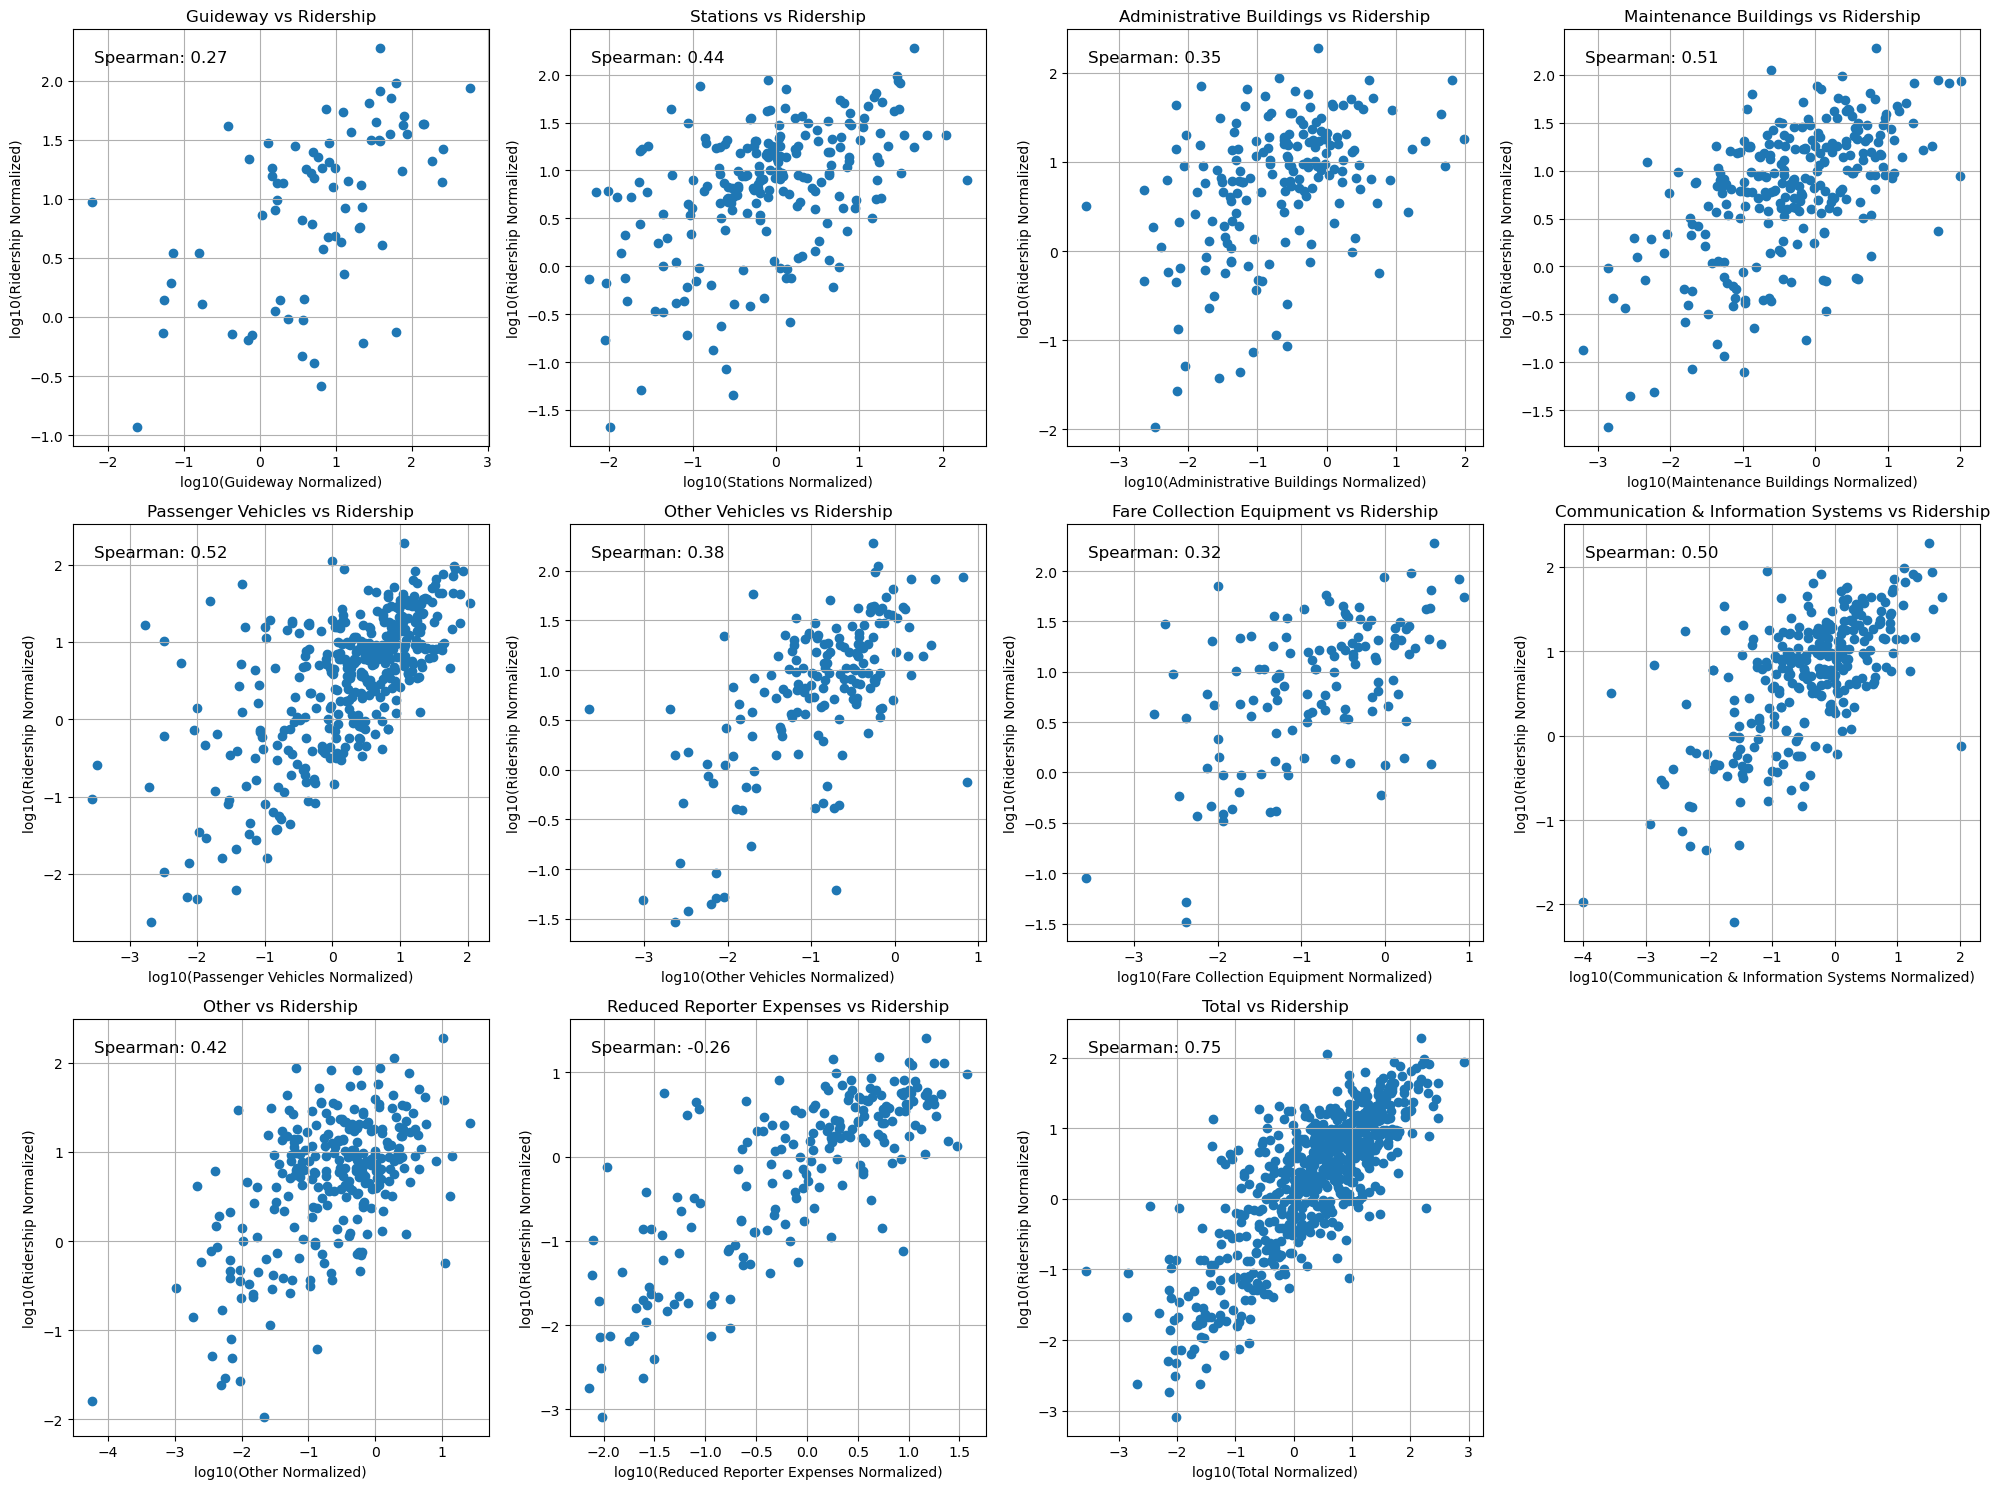

In [117]:
# Grid Size Values
n_plots = len(plotting_columns_capital)
n_rows = 3  
n_cols = int(np.ceil(n_plots / n_rows))  


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,15))  


axes = axes.flatten()


ridership_norm = metrics_filtered['Unlinked Passenger Trips Total']/metrics_filtered['Primary UZA Population']
logridership = np.log10(ridership_norm)


for i, column in enumerate(plotting_columns_capital):
    
    # Calculate x values for the current column
    x_values = np.log10(capital_exp_filtered[column] / capital_exp_filtered['Primary UZA Population'])
    
    # Calculate Spearman correlation
    correlation, _ = spearmanr(x_values, logridership)

    # Create scatter plot
    axes[i].scatter(x_values, logridership)
    axes[i].set_xlabel(f'log10({column} Normalized)')
    axes[i].set_ylabel('log10(Ridership Normalized)')
    axes[i].set_title(f'{column} vs Ridership')
    axes[i].grid(True)

    # Add Spearman correlation to the top left corner
    axes[i].text(0.05, 0.95, f'Spearman: {correlation:.2f}', transform=axes[i].transAxes,
                 fontsize=12, verticalalignment='top')

# Hide the extra plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
